<a href="https://colab.research.google.com/github/sonusajid004/DeepLearning_models/blob/master/LittleVGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/datasets/simpsons.zip"

In [4]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.preprocessing.image import ImageDataGenerator
import os

num_classes = 20
img_rows, img_cols = 32, 32
batch_size = 16

train_data_dir = './simpsons/train'
validation_data_dir = './simpsons/validation'

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

Found 19548 images belonging to 20 classes.
Found 990 images belonging to 20 classes.


In [5]:
model = Sequential()

# First CONV-ReLU Layer
model.add(Conv2D(64, (3, 3), padding = 'same', input_shape = (img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Second CONV-ReLU Layer
model.add(Conv2D(64, (3, 3), padding = "same", input_shape = (img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Max Pooling with Dropout 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 3rd set of CONV-ReLU Layers
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# 4th Set of CONV-ReLU Layers
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Max Pooling with Dropout 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 5th Set of CONV-ReLU Layers
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# 6th Set of CONV-ReLU Layers
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Max Pooling with Dropout 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# First set of FC or Dense Layers
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Second set of FC or Dense Layers
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Final Dense Layer
model.add(Dense(num_classes))
model.add(Activation("softmax"))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)       

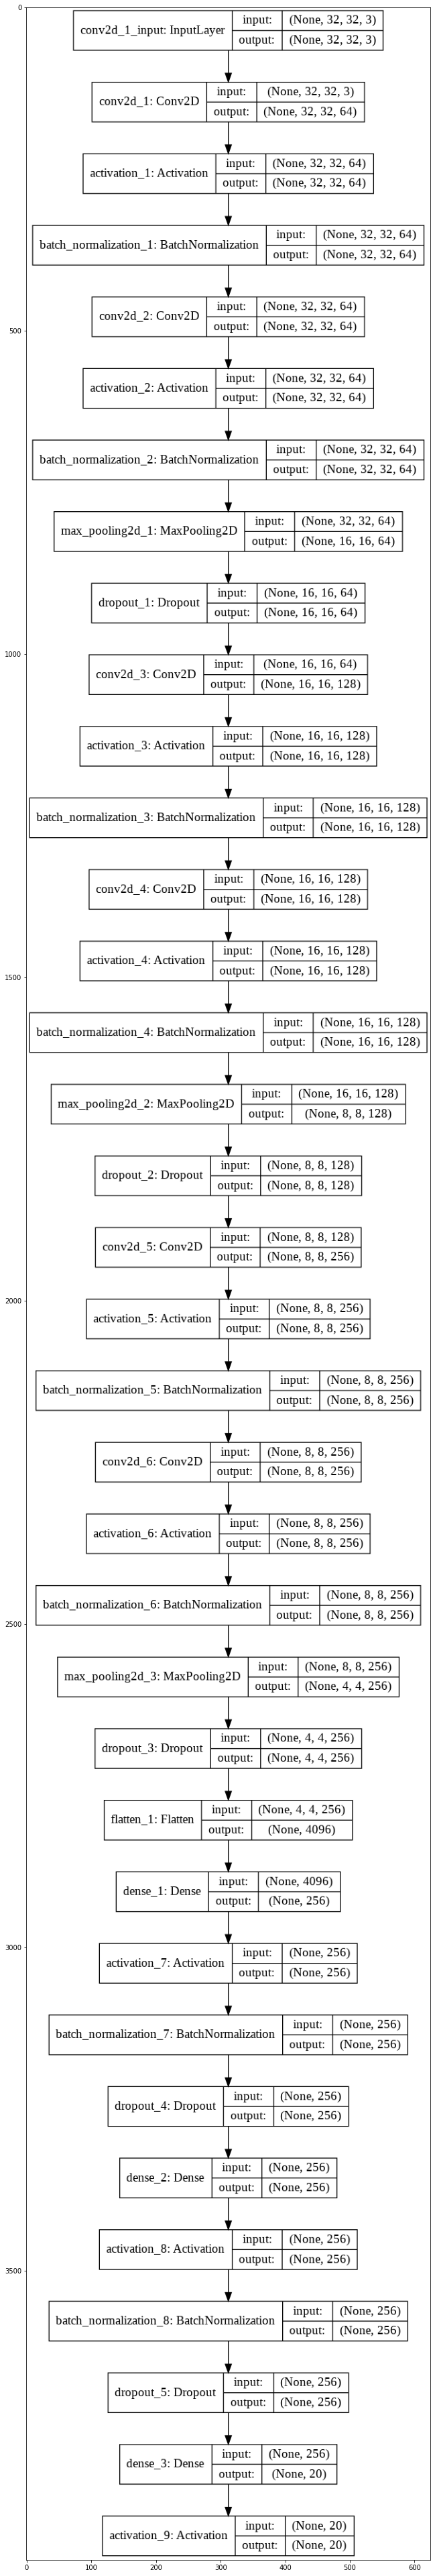

In [6]:
%matplotlib inline
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plot_model(model, to_file='LittleVGG.png', show_shapes=True, show_layer_names=True)
img = mpimg.imread('LittleVGG.png')
plt.figure(figsize=(100,70))
imgplot = plt.imshow(img) 

In [8]:
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                     
checkpoint = ModelCheckpoint("./simpsons_little_vgg.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.00001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.01),
              metrics = ['accuracy'])

nb_train_samples = 19548
nb_validation_samples = 990
epochs = 10

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/10
1221/1221 [==============================] - 621s 509ms/step - loss: 2.8328 - accuracy: 0.1708 - val_loss: 2.3242 - val_accuracy: 0.1967

Epoch 00001: val_loss improved from inf to 2.32417, saving model to ./simpsons_little_vgg.h5
Epoch 2/10
1221/1221 [==============================] - 605s 495ms/step - loss: 2.2949 - accuracy: 0.3009 - val_loss: 2.7826 - val_accuracy: 0.2598

Epoch 00002: val_loss did not improve from 2.32417
Epoch 3/10
1221/1221 [==============================] - 600s 492ms/step - loss: 1.9661 - accuracy: 0.4076 - val_loss: 1.3048 - val_accuracy: 0.4086

Epoch 00003: val_loss improved from 2.32417 to 1.30480, saving model to ./simpsons_little_vgg.h5
Epoch 4/10
1221/1221 [==============================] - 598s 490ms/step - loss: 1.7097 - accuracy: 0.4895 - val_loss: 0.6772 - val_accuracy: 0.5483

Epoch 00004: val_loss improved from 1.30480 to 0.67717, saving model to ./simpsons_little_vgg.h5
Epoch 5/10
1221/1221 [==============================] - 598s 490ms

Found 990 images belonging to 20 classes.
Confusion Matrix
[[ 0  3  2  4  0  0  0 25  0  0  0  0  1  0  1  2  1  3  1  5]
 [ 0 45  0  1  0  0  0  1  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  9  0  0  0  2  0  0  0 26  0  0  0  2  0  1  4  4]
 [ 0  0  0 31  4  0  0  2  0  1  0  0  0  0  0  3  0  2  2  3]
 [ 0  1  0  0 45  0  0  0  0  1  0  0  0  0  0  3  0  0  0  0]
 [ 0  1  0  3 14  5  0  1  0  2  0  0  0  0  0  5  0  1 12  5]
 [ 0  3  0  0  0  0 20  0  0  3  0  1  0  0  0  3  5 10  2  3]
 [ 0  0  0  3  0  0  0 40  0  1  0  1  0  0  0  1  1  0  2  1]
 [ 0  3  0  0  0  0  0  0 30  0  0  1  1  0  0 13  0  0  0  2]
 [ 0  1  0  0  0  0  0  0  0 49  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  7  1  0  0  5  0  0  0  0  0  0  0  8 23  3  1  1]
 [ 0  1  6  9  1  0  0  1  0  0  0 22  0  0  2  2  0  2  1  3]
 [ 0  3  0  0  1  0  0  0  0  1  0  0 43  0  1  0  1  0  0  0]
 [ 0  2  0  0  1  2  0  1  0  0  0  0  0  0  0 18  0  0 14 12]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0 46  1  0  0  0 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


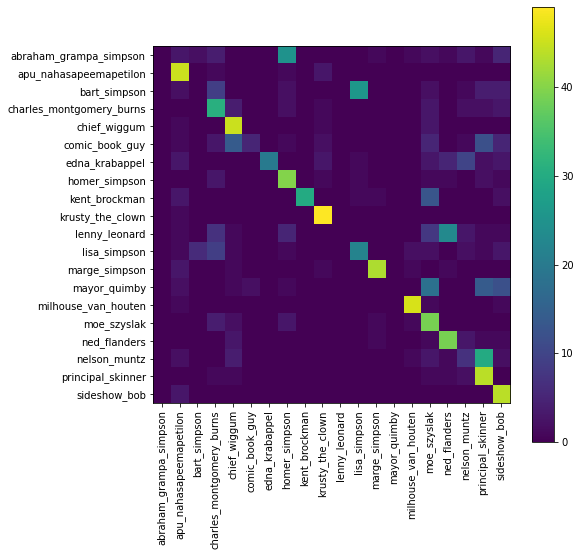

In [9]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# We need to recreate our validation generator with shuffle = false
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 19548
nb_validation_samples = 990

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)